# 02 - Preprocessing

In this notebook we will:
1. Define and test a `clean_text()` function  
2. Apply it to our datasets  
3. Compare text‐length/token stats before & after cleaning  
4. Show examples of raw vs cleaned text  


In [8]:
# Imports
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')


In [10]:
# Prepare stopwords & lemmatizer
STOP = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """Lowercase, remove HTML tags, punctuation/digits, stopwords; lemmatize."""
    # lowercase
    txt = text.lower()
    # remove HTML tags
    txt = re.sub(r'<[^>]+>', ' ', txt)
    # remove URLs
    txt = re.sub(r'http\S+|www\.\S+', ' ', txt)
    # remove punctuation & digits
    txt = re.sub(r'[^a-z\s]', ' ', txt)
    # collapse whitespace
    txt = re.sub(r'\s+', ' ', txt).strip()
    # tokenize & remove stopwords
    tokens = [w for w in txt.split() if w not in STOP]
    # lemmatize
    lemmas = [lemmatizer.lemmatize(w) for w in tokens]
    return ' '.join(lemmas)


In [11]:
# Quick unit tests
samples = [
    "I loved this product!!! <br> It's soooo good. Visit https://example.com",
    "Worst. Purchase. Ever...  :-(",
    "Mixed feelings—I kind of liked it, but shipping was slow."
]
for s in samples:
    print("RAW :", s)
    print("CLEAN:", clean_text(s), "\n")


RAW : I loved this product!!! <br> It's soooo good. Visit https://example.com
CLEAN: loved product soooo good visit 

RAW : Worst. Purchase. Ever...  :-(
CLEAN: worst purchase ever 

RAW : Mixed feelings—I kind of liked it, but shipping was slow.
CLEAN: mixed feeling kind liked shipping slow 



In [15]:
# Load one split (e.g., sentiment proxy train)
df = pd.read_csv('../project_splits/sp_train.csv')   # adjust path for hh/sp/bd

# Before/after lengths
df['raw_wc'] = df['Text'].str.split().apply(len)
df['cleaned'] = df['Text'].apply(clean_text)
df['clean_wc'] = df['cleaned'].str.split().apply(len)

# Summary stats
print("Raw word count:", df['raw_wc'].describe().round(1))
print("Clean word count:", df['clean_wc'].describe().round(1))


Raw word count: count    368069.0
mean         79.0
std          78.6
min           3.0
25%          33.0
50%          55.0
75%          96.0
max        2520.0
Name: raw_wc, dtype: float64
Clean word count: count    368069.0
mean         39.0
std          39.6
min           0.0
25%          16.0
50%          27.0
75%          47.0
max        1564.0
Name: clean_wc, dtype: float64


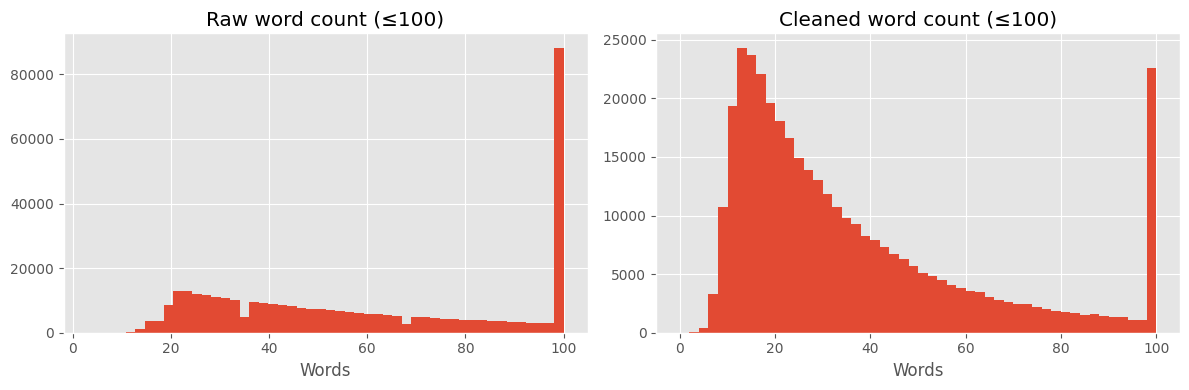

In [16]:
# Plot comparison histograms
fig, axes = plt.subplots(1,2,figsize=(12,4))
df['raw_wc'].clip(upper=100).hist(bins=50, ax=axes[0])
axes[0].set_title('Raw word count (≤100)')
axes[0].set_xlabel('Words')

df['clean_wc'].clip(upper=100).hist(bins=50, ax=axes[1])
axes[1].set_title('Cleaned word count (≤100)')
axes[1].set_xlabel('Words')

plt.tight_layout()
plt.show()


In [17]:
# Show raw vs cleaned examples
for raw, clean in df[['Text','cleaned']].sample(5, random_state=42).values:
    print("RAW    >", raw[:120], "…")
    print("CLEAN  >", clean[:120], "\n")


RAW    > Okay, my chihuaha is finicky...i have wasted lots of money on other rawhide chews and finally found one! Thank you beefe …
CLEAN  > okay chihuaha finicky wasted lot money rawhide chew finally found one thank beefeater 

RAW    > I only gave this tea a star because I couldn't post a review without at least one. It really rates ZERO stars.<br />I ha …
CLEAN  > gave tea star post review without least one really rate zero star loved good earth original sweet spicy caffeine free he 

RAW    > First off ignore Alvatore Bilotti review, not to bright<br />Anyway this stuff is very good, not to salty or over flavor …
CLEAN  > first ignore alvatore bilotti review bright anyway stuff good salty flavored get costco save anyone would buy insane cau 

RAW    > I have been a huge fan Aero bars for years, but up until recently they were difficult to find in the US. While Nestle ma …
CLEAN  > huge fan aero bar year recently difficult find u nestle make great chocolate cadbury dairy milk chocol

In [18]:
# Save cleaned column for later notebooks
df.to_csv('../project_splits/sp_train_clean.csv', index=False)
